# A/B-тестирование и приоритизация гипотез

## Описание проекта

В рамках проекта для крупного интернет-магазина необходимо приоритизировать гипотезы, запусть A/B-тест и проанализировать результаты.

**Цель проекта**: в рамках проекта необходимо выбрать приоритетную гипотезу, которая направлена на улучшение ключевых метрик интернет-магазина, проверить ее посредством A/B-теста и дать рекомендации о внедрении.

**План работы**:

* Приоритизировать гипотезы методами ICE и RICE.
* Для приоритетной гипотезы провести A/B-тест.
* Интерпретировать результаты теста и дать рекомендации о целесообразности внедрения.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 100

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Приоритизация гипотез

### Описание данных

Набор данных `hypothesis`:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Импорт данных

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

### Расчёт показателей ICE и RICE

In [3]:
hypo['ICE'] = round(hypo.Impact * hypo.Confidence / hypo.Efforts, 2)
hypo['RICE'] = round(hypo.Reach * hypo.Impact * hypo.Confidence / hypo.Efforts, 2)

### Результат приоритизации гипотез

In [4]:
display(hypo.sort_values(by='ICE', ascending=False))
display(hypo.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Заключение

Результаты приоритизации методами ICE и RICE различаются. Например, гипотеза №8 является самой приоритетной по методу ICE, но занимает 5 место по методу RICE. Различие заключается в том, что в методе RICE мы дополнительно учитываем Reach, т.е. охват.

В работу следует взять одну из гипотез, находящихся в топ-3 при расчёте обоими методами, т.е. гипотезу №7 или гипотезу №0. 

В данном случае, рекомендую начать отрабатывать **гипотезу №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)**, т.к. мы достаточно уверены, что реализация данной гипотезы сильно повлияет на охваченных пользователей (при этом, охват у данной гипотезы также максимальный). Также мы хорошо уверены в точности нашей оценки. Трудозатраты на реализацию данной гипотезы выше, чем на реализацию гипотезы №0, однако данная разница не столь критичная.

## Анализ A/B-теста

Для A/B-теста была выбрана гипотеза: "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*". 

A/B-тест проводился в период с 2019-08-01 по 2019-08-31.


### Описание данных

Набор данных `orders`:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Набор данных `visitors`:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Импорт и предобработка данных

Импортируем результаты теста, а также приведем поле `date` к типу datetime. Дополнительно назначим уровень значимости для последующих статистических тестов. Уровень значимости принимаем равным 0.05, так как меньший уровень используется, как правило, для очень высокоточных тестов в научных исследованиях.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
alpha = 0.05

**Вывод**: результаты A/B-теста успешно импортированы.

### Проверка данных

Перед началом анализа результатов теста проверим данные на соответствие типов данных, на отсутствие дубликатов, а также удостоверимся, что группы тестирования соразмерны.

In [6]:
orders.info()
display(orders.describe())
display(orders.head())
print('Количество дубликатов:', orders.duplicated().sum())
print('Количество групп:', len(orders.group.unique()))
print(f'Временной интервал набора данных {orders.date.min()} - {orders.date.max()}')
unVisA = pd.Series(orders[orders['group'] == 'A']['visitorId'].unique())
unVisB = pd.Series(orders[orders['group'] == 'B']['visitorId'].unique())
print('Количество пользователей, попавших в обе группы:', unVisA.isin(unVisB).sum())
print('Количество объектов группы А:', len(orders[orders['group'] == 'A']))
print('Количество объектов группы B:', len(orders[orders['group'] == 'B']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Количество дубликатов: 0
Количество групп: 2
Временной интервал набора данных 2019-08-01 00:00:00 - 2019-08-31 00:00:00
Количество пользователей, попавших в обе группы: 58
Количество объектов группы А: 557
Количество объектов группы B: 640


In [7]:
visitors.info()
display(visitors.describe())
display(visitors.head())
print('Количество дубликатов:', visitors.duplicated().sum())
print('Количество групп:', len(visitors.group.unique()))
print(f'Временной интервал набора данных {visitors.date.min()} - {visitors.date.max()}')
print('Количество объектов группы А:', len(visitors[visitors['group'] == 'A']))
print('Количество объектов группы B:', len(visitors[visitors['group'] == 'B']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Количество дубликатов: 0
Количество групп: 2
Временной интервал набора данных 2019-08-01 00:00:00 - 2019-08-31 00:00:00
Количество объектов группы А: 31
Количество объектов группы B: 31


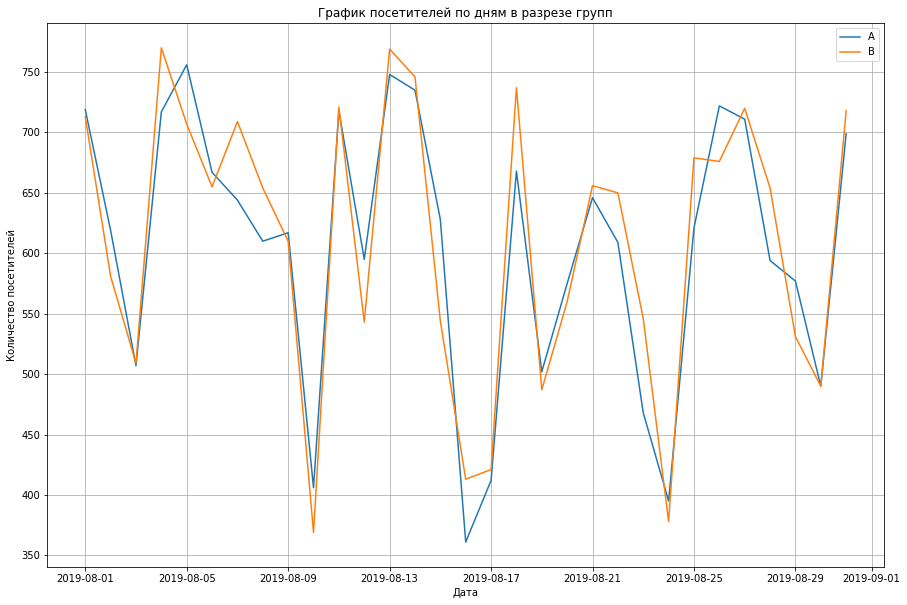

In [8]:
visByDaysA = visitors[visitors['group'] == 'A']
visByDaysB = visitors[visitors['group'] == 'B']
plt.figure(figsize=(15, 10));
plt.plot(visByDaysA['date'], visByDaysA['visitors'], label='A');
plt.plot(visByDaysB['date'], visByDaysB['visitors'], label='B');
plt.legend();
plt.grid();
plt.title('График посетителей по дням в разрезе групп');
plt.xlabel('Дата');
plt.ylabel('Количество посетителей');
plt.show();

**Вывод**: результаты A/B-теста полностью пригодны для дальнейшего анализа, хотя и присутствует некоторое пересечение групп (т.е. ряд пользователей участвует в обоих группах).

### Анализ кумулятивных метрик

Подготовим данные о заказах, посетителях и выручке для анализа кумулятивных метрик в разрезе групп.

In [9]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId':'nunique', 'revenue':'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}
    ), axis=1
).sort_values(by='date')
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,20,148579
1,2019-08-02,39,242401
2,2019-08-03,63,354874
3,2019-08-04,78,425699
4,2019-08-05,103,549917


In [10]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId':'nunique', 'revenue':'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}
    ), axis=1
).sort_values(by='date')
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,20,101217
1,2019-08-02,43,266748
2,2019-08-03,59,380996
3,2019-08-04,75,489567
4,2019-08-05,98,581995


In [11]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [12]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [13]:
abtest = (
    ordersADaily.merge(
        ordersBDaily, on='date', how='left'
    )
    .merge(ordersACummulative, on='date', how='left')
    .merge(ordersBCummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
    .merge(visitorsACummulative, on='date', how='left')
    .merge(visitorsBCummulative, on='date', how='left')
)

abtest['conversionA'] = abtest.ordersPerDateA / abtest.visitorsPerDateA
abtest['conversionB'] = abtest.ordersPerDateB / abtest.visitorsPerDateB

abtest['conversionCummulativeA'] = abtest.ordersCummulativeA / abtest.visitorsCummulativeA
abtest['conversionCummulativeB'] = abtest.ordersCummulativeB / abtest.visitorsCummulativeB

abtest.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,conversionA,conversionB,conversionCummulativeA,conversionCummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713,0.027816,0.028050,0.027816,0.028050
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294,0.030695,0.039587,0.029148,0.033230
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803,0.047337,0.031434,0.034146,0.032723
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573,0.020921,0.020779,0.030445,0.029149
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280,0.033069,0.032532,0.031043,0.029878


#### Кумулятивная выручка

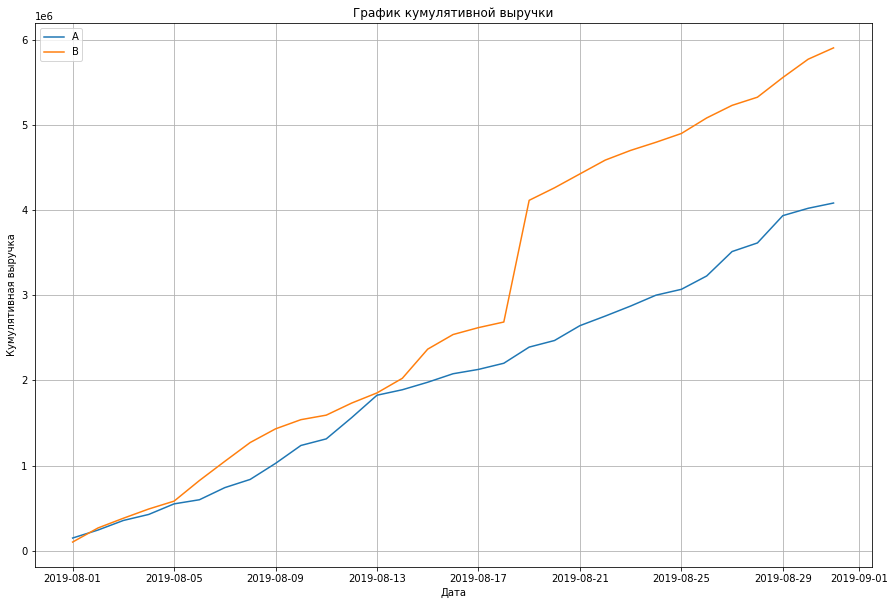

In [14]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], abtest['revenueCummulativeA'], label='A');
plt.plot(abtest['date'], abtest['revenueCummulativeB'], label='B');
plt.legend();
plt.grid();
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.show();

**Вывод**: до 13 августа выручка групп А и В различается несильно, однако после 13 августа начинается заметное расхождение в пользу группы В. Причем, данное расхождение больше связано с поведением группы В, т.к. кумулятивная выручка группы А выглядит практически линейно. Конечные интервалы можно считать установившимися относительно линейной апроксимации.

#### Кумулятивный средний чек

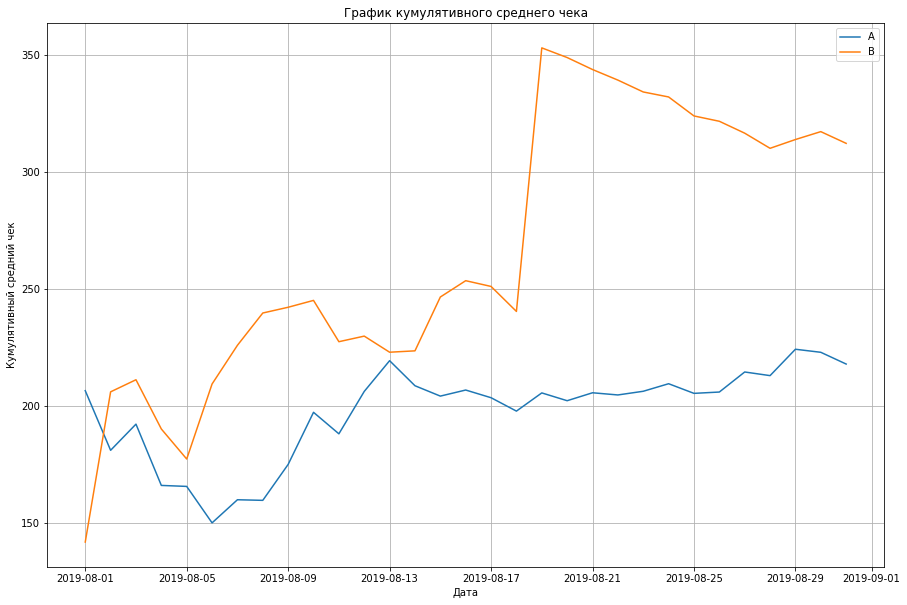

In [15]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], abtest['revenueCummulativeA'] / abtest['visitorsCummulativeA'], label='A');
plt.plot(abtest['date'], abtest['revenueCummulativeB'] / abtest['visitorsCummulativeB'], label='B');
plt.legend();
plt.grid();
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.show();

**Вывод**: кумулятивный средний чек группы В стабильно выше (за исключением самого начала эксперимента) группы А. При этом, стоит обратить внимание, что после 18 августа различие становится более явным. Конечные интервалы можно считать установившимися.

#### Относительное различие кумулятивного среднего чека

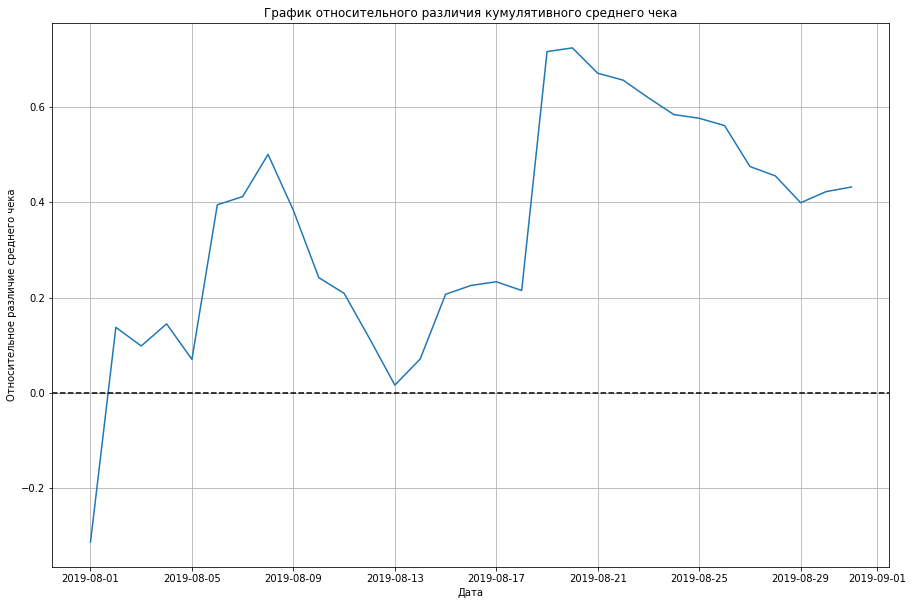

In [16]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], ((abtest['revenueCummulativeB'] / abtest['visitorsCummulativeB']) / (abtest['revenueCummulativeA'] / abtest['visitorsCummulativeA']))-1);
plt.grid();
plt.title('График относительного различия кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное различие среднего чека')
plt.axhline(0, linestyle='--', color='black')
plt.show();

**Вывод**: как было замечено ранее, средний чек группы В стабильно превышает средний чек группы А за исключением первых дней A/B-теста. На данном графике результат не выглядит, как установившийся, однако его можно назвать достаточным, чтобы заключить на уровне тенденции о доминирующем результате группы В.

#### Кумулятивное количество заказов

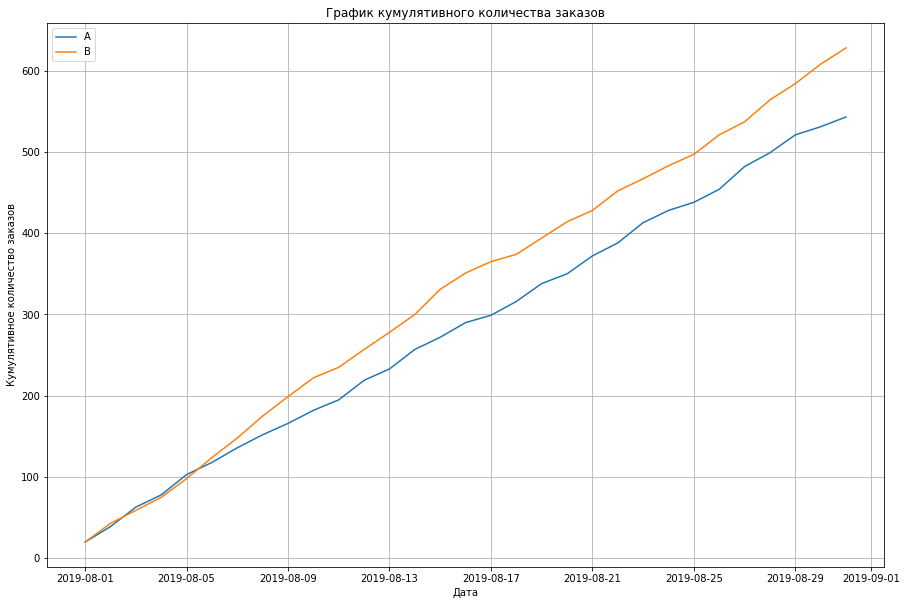

In [17]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], abtest['ordersCummulativeA'], label='A');
plt.plot(abtest['date'], abtest['ordersCummulativeB'], label='B');
plt.legend();
plt.grid();
plt.title('График кумулятивного количества заказов')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество заказов')
plt.show();

**Вывод**: кумулятивная конверсия группы В начиная с 6 августа стабильно превышает группу А. Значения также можно считать установившимися относительно линейной апроксимации.

#### Относительное различие кумулятивного количества заказов

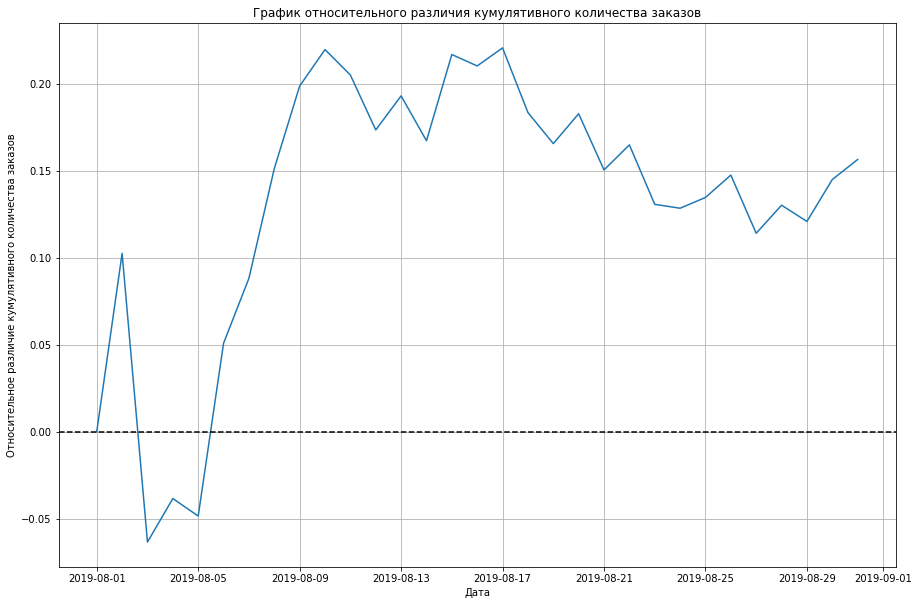

In [18]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], abtest['ordersCummulativeB'] / abtest['ordersCummulativeA'] - 1);
plt.grid();
plt.title('График относительного различия кумулятивного количества заказов')
plt.xlabel('Дата')
plt.ylabel('Относительное различие кумулятивного количества заказов')
plt.axhline(0, linestyle='--', color='black')
plt.show();

**Вывод**: результаты в точности повторяют выводы, полученные при анализе относительного различие среднего чека, т.е. нельзя строго назвать результат установившимся, но на уровне тенденции количество заказов группы В выше, чем количество заказов группы А.

#### Кумулятивная конверсия

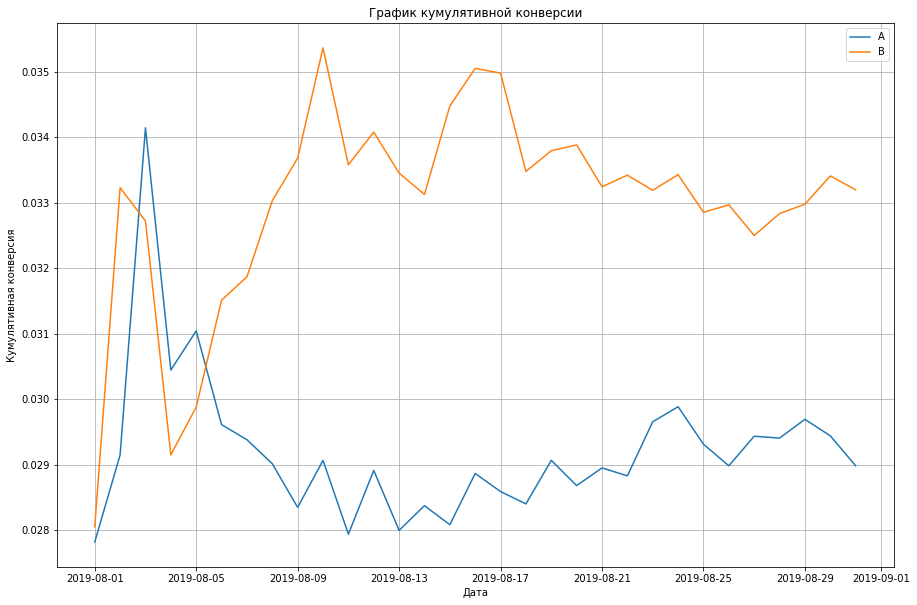

In [19]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], abtest['conversionCummulativeA'], label='A');
plt.plot(abtest['date'], abtest['conversionCummulativeB'], label='B');
plt.legend();
plt.grid();
plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.show();

**Вывод**: кумулятивная конверсия группы В стабильно выше группы А, начиная с 6 августа. Данные можно назвать стабилизировавшимися на уровне тенденции.

#### Относительное различие кумулятивной конверсии

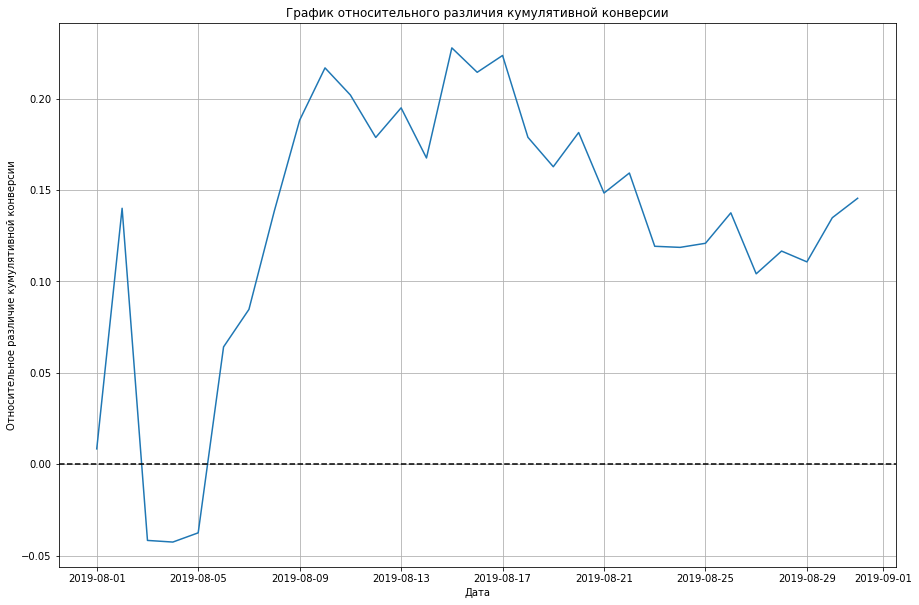

In [20]:
plt.figure(figsize=(15, 10));
plt.plot(abtest['date'], abtest['conversionCummulativeB'] / abtest['conversionCummulativeA'] - 1);
plt.grid();
plt.title('График относительного различия кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Относительное различие кумулятивной конверсии')
plt.axhline(0, linestyle='--', color='black')
plt.show();

**Вывод**: кумулятивная конверсия группы В стабильно выше группы А, начиная с 6 августа. Причём после 6 августа различие стабильно превышает 10%.

#### Распределение количества заказов

95 перцентиль количества заказов: 2.0
99 перцентиль количества заказов: 4.0


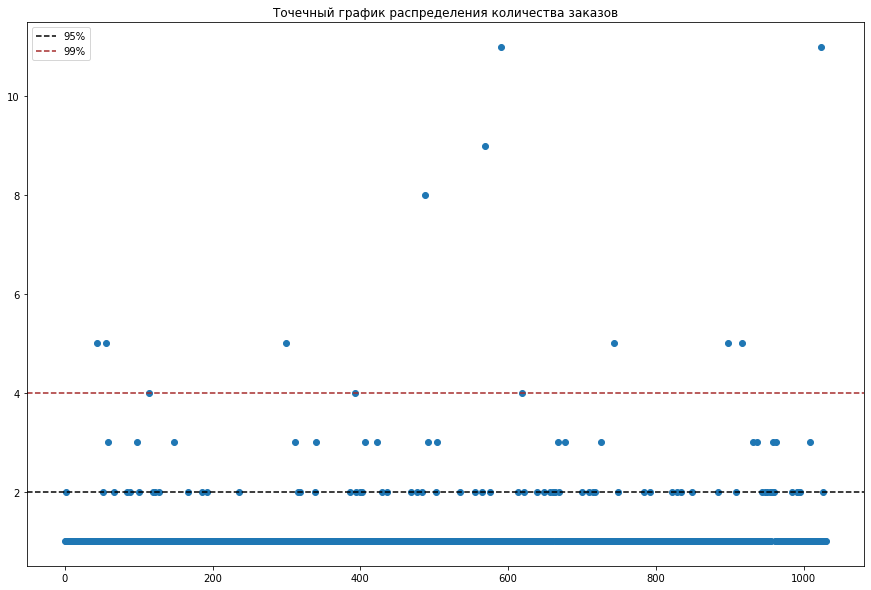

In [21]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg('nunique')[['visitorId', 'transactionId']]
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(15, 10));
plt.scatter(range(len(ordersByUsers)), ordersByUsers['orders']);
plt.title('Точечный график распределения количества заказов')
obsperc = np.percentile(ordersByUsers['orders'], [95, 99])
plt.axhline(obsperc[0], linestyle='--', color='black', label='95%')
plt.axhline(obsperc[1], linestyle='--', color='brown', label='99%')
plt.legend()
print(f'95 перцентиль количества заказов: {obsperc[0]}\n99 перцентиль количества заказов: {obsperc[1]}')

**Вывод**: нетрудно заметить, что есть пользователи, которые совершили нехарактерно много заказов. Данных пользователей можно будет исключить при фильтрации данных. Таким образом, при фильтрации будем исключать пользователей, совершивших более 4 заказов (99 перцентиль).

#### Распределение выручки

95 перцентиль выручки: 28000.000000000004
99 перцентиль выручки: 58233.19999999999


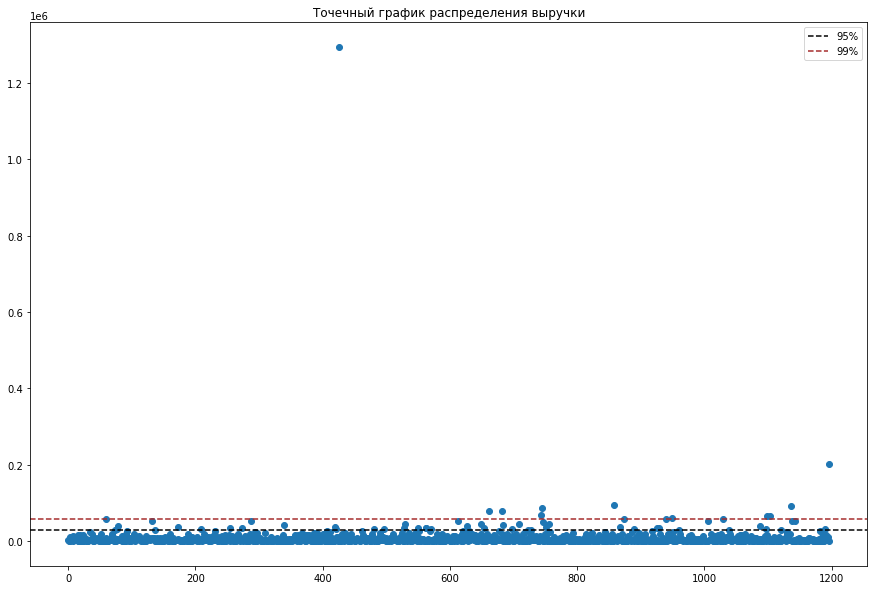

In [22]:
plt.figure(figsize=(15, 10));
plt.scatter(range(len(orders)), orders['revenue']);
plt.title('Точечный график распределения выручки')
obsperc = np.percentile(orders['revenue'], [95, 99])
plt.axhline(obsperc[0], linestyle='--', color='black', label='95%')
plt.axhline(obsperc[1], linestyle='--', color='brown', label='99%')
plt.legend()
print(f'95 перцентиль выручки: {obsperc[0]}\n99 перцентиль выручки: {obsperc[1]}')

**Вывод**: в результат теста попали пользователи, которые совершили заказы на очень большую сумму. Пороговым значением будет установлено 58000 (условно, 99 перцентиль). Все пользователи, которые платили за заказ более 58000 будут исключены при фильтрации данных.

### Статистические тесты на "сырых" данных

#### Гипотеза о равенстве количества заказов

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                abtest['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                abtest['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

test = stats.mannwhitneyu(sampleA, sampleB)
print('H0: Количество заказов в группе B статистически значимо не отличается от количества заказов в группе A')
print('H1: Количество заказов в группе B статистически значимо отличается от количества заказов в группе A')
print("P-value теста Манна-Уитни: {0:.3f}".format(test[1]))
print("Расчётная разница средних между группами: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
if test[1] < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

H0: Количество заказов в группе B статистически значимо не отличается от количества заказов в группе A
H1: Количество заказов в группе B статистически значимо отличается от количества заказов в группе A
P-value теста Манна-Уитни: 0.017
Расчётная разница средних между группами: 0.138
Нулевая гипотеза отвергнута


**Вывод**: среднее количество заказов в группе В превышает среднее количество заказов в группе А почти на 14%. Данное различие является статистически значимым.

#### Гипотеза о равенстве средних чеков

In [24]:
test = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('H0: Средний чек в группе B статистически значимо не отличается от среднего чека в группе A')
print('H1: Средний чек в группе B статистически значимо отличается от среднего чека в группе A')
print("P-value теста Манна-Уитни: {0:.3f}".format(test[1]))
print("Расчётная разница средних между группами: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if test[1] < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

H0: Средний чек в группе B статистически значимо не отличается от среднего чека в группе A
H1: Средний чек в группе B статистически значимо отличается от среднего чека в группе A
P-value теста Манна-Уитни: 0.729
Расчётная разница средних между группами: 0.259
Не получилось отвергнуть нулевую гипотезу


**Вывод**: средний чек в группе В превышает средний чек в группе А почти на 26%. Данное различие не является статистически значимым.

#### Гипотеза о равенстве конверсий

In [25]:
test = stats.mannwhitneyu(abtest['conversionA'], abtest['conversionB'])
print('H0: Конверсия в группе B статистически значимо не отличается от конверсии в группе A')
print('H1: Конверсия в группе B статистически значимо отличается от конверсии в группе A')
print("P-value теста Манна-Уитни: {0:.3f}".format(test[1]))
print("Расчётная разница средних между группами: {0:.3f}".format(abtest['conversionB'].mean()/abtest['conversionA'].mean()-1))

if test[1] < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

H0: Конверсия в группе B статистически значимо не отличается от конверсии в группе A
H1: Конверсия в группе B статистически значимо отличается от конверсии в группе A
P-value теста Манна-Уитни: 0.074
Расчётная разница средних между группами: 0.158
Не получилось отвергнуть нулевую гипотезу


**Вывод**: конверсия группы В превышает конверсию группы А почти на 16%, однако данное различие нельзя считать статистически значимым.

### Статистические тесты на "очищенных" данных

In [26]:
usManyOrd = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
    ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']],
    axis=0
)
usExpOrd = orders[orders['revenue'] > 58000]['visitorId']
abnormUs = pd.concat([usManyOrd, usExpOrd]).drop_duplicates()

#### Гипотеза о равенстве количества заказов

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormUs))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                abtest['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormUs))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                abtest['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

test = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('H0: Количество заказов в группе B статистически значимо не отличается от количества заказов в группе A')
print('H1: Количество заказов в группе B статистически значимо отличается от количества заказов в группе A')
print("P-value теста Манна-Уитни: {0:.3f}".format(test[1]))
print("Расчётная разница средних между группами: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

if test[1] < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

H0: Количество заказов в группе B статистически значимо не отличается от количества заказов в группе A
H1: Количество заказов в группе B статистически значимо отличается от количества заказов в группе A
P-value теста Манна-Уитни: 0.014
Расчётная разница средних между группами: 0.153
Нулевая гипотеза отвергнута


**Вывод**: как и на "сырых" данных, нулевая гипотеза отвергается. Разница средних немного превышает 15% в пользу группы В.

#### Гипотеза о равенстве средних чеков

In [28]:
test = stats.mannwhitneyu(orders[(orders['group']=='A') & ~(orders['visitorId'].isin(abnormUs))]['revenue'], 
                          orders[(orders['group']=='B') & ~(orders['visitorId'].isin(abnormUs))]['revenue'])
print('H0: Средний чек в группе B статистически значимо не отличается от среднего чека в группе A')
print('H1: Средний чек в группе B статистически значимо отличается от среднего чека в группе A')
print("P-value теста Манна-Уитни: {0:.3f}".format(test[1]))
print("Расчётная разница средних между группами: {0:.3f}".format(orders[(orders['group']=='B') & ~(orders['visitorId'].isin(abnormUs))]['revenue'].mean()/
                                                                 orders[(orders['group']=='A') & ~(orders['visitorId'].isin(abnormUs))]['revenue'].mean()-1))

if test[1] < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

H0: Средний чек в группе B статистически значимо не отличается от среднего чека в группе A
H1: Средний чек в группе B статистически значимо отличается от среднего чека в группе A
P-value теста Манна-Уитни: 0.851
Расчётная разница средних между группами: -0.006
Не получилось отвергнуть нулевую гипотезу


**Вывод**: На очищенных данных средний чек группы В уже немного ниже, чем средний чек группы А, однако данное различие статистически незначимо.

#### Гипотеза о равенстве конверсий

Гипотезу о равенстве конверсий на очищенных данных проверить невозможно, так как мы не можем исключить из визитов пользователей, которых считаем аномальными, т.к. нет детализации по visitorId.

### Заключение

По результату A/B-теста можно сделать следующие выводы:
1. Время проведения теста является достаточным для формирования конечных выводов.
2. Среднее количество заказов группы В статистически значимо превышает среднее количество заказов группы А.
3. Средний чек группы В статистически значимо не отличается от среднего чека группы А.
4. Конверсия пользователей группы В статистически значимо не отличается от конверсии пользователей группы А.

Таким образом, результат A/B-теста можно считать успешным, так как благодаря нововведениям можно увеличить количество заказов при сохранении остальных метрик, что в конечном итоге должно увеличить валовую прибыль. При внедрении необходимо обратить внимание на то, что могут увеличиться операционных расходы в связи с ростом количества заказов и это нужно учитывать, чтобы операционные расходы вырастали пропорционально валовой прибыли и не приводили к уменьшению операционной, а тем более, чистой прибыли.